<a href="https://colab.research.google.com/github/arshad-huh/100-Days-Challenge/blob/main/19_pandas_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# 10 challenging coding questions involving pandas, using the tips dataset from seaborn:

In [2]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### How can you calculate the total bill per day for each gender using the tips dataset and present the results in a DataFrame?

In [3]:
df1 = tips.pivot_table(index='day', columns='sex', values='total_bill', aggfunc='sum')
df1

sex,Male,Female
day,,
Thur,561.44,534.89
Fri,198.57,127.31
Sat,1227.35,551.05
Sun,1269.46,357.70


<Axes: xlabel='day'>

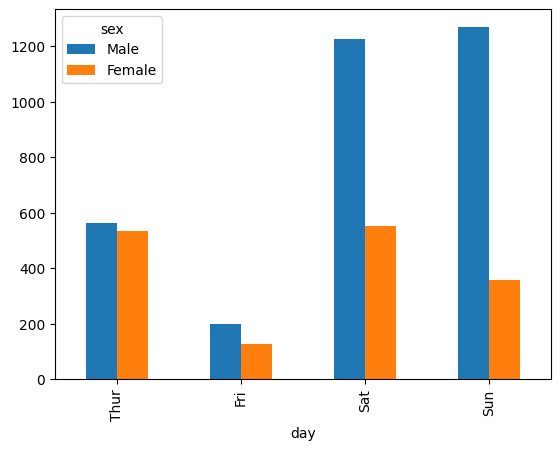

In [4]:
df1.plot(kind='bar')

### Create a new column called tip_percentage in the tips DataFrame that represents the tip as a percentage of the total bill. Then, calculate the average tip_percentage for each day.

In [5]:
tips['tips_pct'] = (tips['tip']/tips['total_bill']) *100
tips.groupby('day')['tips_pct'].mean()

day
Thur    16.127563
Fri     16.991303
Sat     15.315172
Sun     16.689729
Name: tips_pct, dtype: float64

### Find the maximum and minimum total bill for each combination of day and time (Lunch/Dinner).

In [6]:
tips.groupby(['day', 'time'])['total_bill'].agg(['min', 'max'])

min    max
day  time                
Thur Lunch    7.51  43.11
     Dinner  18.78  18.78
Fri  Lunch    8.58  16.27
     Dinner   5.75  40.17
Sat  Lunch     NaN    NaN
     Dinner   3.07  50.81
Sun  Lunch     NaN    NaN
     Dinner   7.25  48.17

### Using the tips dataset, determine the count of smokers and non-smokers for each day. Present the result in a DataFrame.

In [8]:
df2 = pd.crosstab(tips['day'], tips['smoker'])
df2

smoker,Yes,No
day,,
Thur,17,45
Fri,15,4
Sat,42,45
Sun,19,57


<Axes: xlabel='smoker', ylabel='day'>

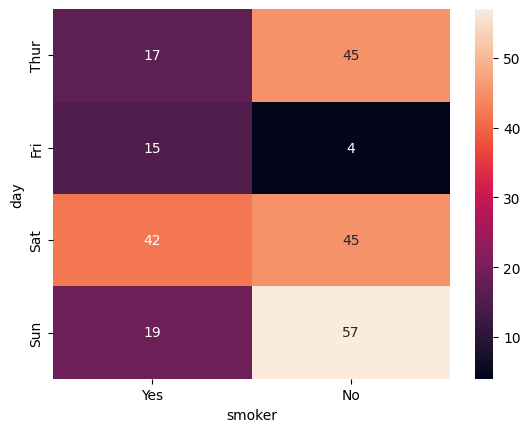

In [10]:
sns.heatmap(df2, annot=True)

### Calculate the difference between the average tip given by male and female customers for each day.

In [14]:
df3 = tips.pivot_table(index='day', columns='sex', values='tip', aggfunc='mean')
df3

sex,Male,Female
day,,
Thur,2.980333,2.575625
Fri,2.693000,2.781111
Sat,3.083898,2.801786
Sun,3.220345,3.367222


In [15]:
df3['diff_tip'] = df3['Male'] - df3['Female']
df3

sex,Male,Female,diff_tip
day,,,
Thur,2.980333,2.575625,0.404708
Fri,2.693000,2.781111,-0.088111
Sat,3.083898,2.801786,0.282113
Sun,3.220345,3.367222,-0.146877


### Identify the top 3 days with the highest average total bill. Present the results in descending order

In [18]:
tips.groupby('day')['total_bill'].mean().sort_values(ascending=False).head(3)

day
Sun     21.410000
Sat     20.441379
Thur    17.682742
Name: total_bill, dtype: float64

### Find the correlation matrix for numerical columns in the tips dataset. Which pair of columns has the highest correlation?

In [31]:
s = tips.select_dtypes(include='number').corr().unstack()
s[s!=1].sort_values(ascending=False).head(1)

total_bill  tip    0.675734
dtype: float64

### Add a new column called day_of_week to the tips DataFrame that maps the day column to numbers (e.g., Thur=4, Fri=5, Sat=6, Sun=7). Then, sort the DataFrame by this new column.

In [33]:
day_mapping = {'Thur': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}
tips['day_of_week'] = tips['day'].map(day_mapping)
tips
tips.sort_values('day_of_week')

,total_bill,tip,sex,smoker,day,time,size,tips_pct,day_of_week
121,13.42,1.68,Female,No,Thur,Lunch,2,12.518629,4
133,12.26,2.00,Female,No,Thur,Lunch,2,16.313214,4
132,11.17,1.50,Female,No,Thur,Lunch,2,13.428827,4
131,20.27,2.83,Female,No,Thur,Lunch,2,13.961519,4
130,19.08,1.50,Male,No,Thur,Lunch,2,7.861635,4
...,...,...,...,...,...,...,...,...,...
158,13.39,2.61,Female,No,Sun,Dinner,2,19.492158,7
157,25.00,3.75,Female,No,Sun,Dinner,4,15.000000,7
156,48.17,5.00,Male,No,Sun,Dinner,6,10.379905,7
186,20.90,3.50,Female,Yes,Sun,Dinner,3,16.746411,7


### Create a new DataFrame showing the total bill and tip sums for each combination of day and table size (size). Then, unstack the table size so that it becomes a column level.

In [35]:
df4= tips.groupby(['day', 'size'])[['total_bill', 'tip']].sum()
df4

total_bill     tip
day  size                    
Thur 1          10.07    1.83
     2         727.53  117.24
     3          76.64   10.77
     4         149.75   21.09
     5          41.19    5.00
     6          91.15   15.90
Fri  1           8.58    1.92
     2         261.15   42.31
     3          15.98    3.00
     4          40.17    4.73
     5           0.00    0.00
     6           0.00    0.00
Sat  1          10.32    2.00
     2         892.37  133.43
     3         459.17   68.36
     4         388.39   53.61
     5          28.15    3.00
     6           0.00    0.00
Sun  1           0.00    0.00
     2         684.84  109.86
     3         332.76   46.81
     4         480.39   73.58
     5          81.00   12.14
     6          48.17    5.00

In [37]:
df4.unstack(level=['size'])

total_bill                                         tip                 \
size          1       2       3       4      5      6     1       2      3   
day                                                                          
Thur      10.07  727.53   76.64  149.75  41.19  91.15  1.83  117.24  10.77   
Fri        8.58  261.15   15.98   40.17   0.00   0.00  1.92   42.31   3.00   
Sat       10.32  892.37  459.17  388.39  28.15   0.00  2.00  133.43  68.36   
Sun        0.00  684.84  332.76  480.39  81.00  48.17  0.00  109.86  46.81   

                          
size      4      5     6  
day                       
Thur  21.09   5.00  15.9  
Fri    4.73   0.00   0.0  
Sat   53.61   3.00   0.0  
Sun   73.58  12.14   5.0

or

In [36]:
tips.pivot_table(values=['total_bill', 'tip'], index='day', columns='size', aggfunc='sum')

tip                                    total_bill                  \
size     1       2      3      4      5     6          1       2       3   
day                                                                        
Thur  1.83  117.24  10.77  21.09   5.00  15.9      10.07  727.53   76.64   
Fri   1.92   42.31   3.00   4.73   0.00   0.0       8.58  261.15   15.98   
Sat   2.00  133.43  68.36  53.61   3.00   0.0      10.32  892.37  459.17   
Sun   0.00  109.86  46.81  73.58  12.14   5.0       0.00  684.84  332.76   

                            
size       4      5      6  
day                         
Thur  149.75  41.19  91.15  
Fri    40.17   0.00   0.00  
Sat   388.39  28.15   0.00  
Sun   480.39  81.00  48.17